# Homework #1
### 1.숫자인식을 할 수 있는 Single-layer-Perceptron을 설계해보자.

In [2]:
import os
import csv

import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

# 이번 인공 신경망은 4개의 뉴런으로 구성하였으며, 각각의 index에 해당하는 배열은 숫자 0~9을 나타내는 것이다.
answer =np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
          [1,0,0,0],[1,0,0,1]])

# 내가 디자인한 손글씨 숫자 10개
# 폴더 안의 모든 train png 파일을 digit_list 안에 넣습니다. 
train_path = './NUM_IMAGE/TEST/'
train_list = os.listdir(train_path)

# 노이즈를 추가한 테스트 데이터
# 폴더 안의 모든 test png 파일을 digit_list 안에 넣습니다. 
digit_path ='./NUM_IMAGE/TRAINING/'
digit_list = os.listdir(digit_path)  

train_digit = []
data_digit = []

# 학습 데이터 만들기
# png 파일은 RGBP 형식으로 되어 있으며, GrayScale level로 평준화 시켜주도록 합니다.
# 즉, 컬러 에서 흑백으로 만들어 주는 것입니다.
# 폴더 안의 파일 들을 모두 흑백으로 변경하는 것-> GrayScale
# 흑백으로 변환된 8x6 의 png 파일을 행렬로 변환 후 0~1의 수로 감소시켜 줍니다.

for train_png in train_list:
   
    # png 파일이름의 첫번째 글자는 파일이 나타내는 숫자를 의미하므로 첫번째 글자 즉, 실제 답을 real_answer에 저장합니다.
    # ex) 10.png => 첫 번째 글자가 1이므로 이파일은 1을 나타낸다.
    train_answer = int(train_png[0:1])
    
    # 8X6의 png파일을 GrayScale 로 변환 후 열어 줍니다..
    # GrayScale -> 각 픽셀의 요소를 0~1로 변경 -> 8x6배열을 1차원 배열로 변경 -> 1차원 배열에 실제 답을 붙여 data를 생성
    # 8x6 파일의 각 픽셀을 0~1로 설정하기 위해 -255를 해줍니다.
    # 8x6 배열을 1차원 배열로 변경 후 최종적으로 저장합니다.
    # 데이터 완성!!
    train_image = Image.open(train_path + train_png).convert('L')
    train_arr = (np.array(train_image) - 255) 
    train_arr_to_1d = train_arr.flatten()
    train_arr_to_1d = np.append(train_arr_to_1d, answer[train_answer])           #data 생성
    
    # numpy 배열로 저장된 모든 손글씨 data를 반복문을 돌며 list에 저장
    train_digit.append(train_arr_to_1d)

# 테스트 데이터 만들기
for digit_png in digit_list:
   
    # png 파일이름의 첫번째 글자는 파일이 나타내는 숫자를 의미하므로 첫번째 글자 즉, 실제 답을 real_answer에 저장합니다.
    # ex) 10.png => 첫 번째 글자가 1이므로 이파일은 1을 나타낸다.
    real_answer = int(digit_png[0:1])
    
    # 8X6의 png파일을 GrayScale 로 변환 후 열어 줍니다..
    # GrayScale -> 각 픽셀의 요소를 0~1로 변경 -> 8x6배열을 1차원 배열로 변경 -> 1차원 배열에 실제 답을 붙여 data를 생성
    # 8x6 파일의 각 픽셀을 0~1로 설정하기 위해 -255를 해줍니다.
    # 8x6 배열을 1차원 배열로 변경 후 최종적으로 저장합니다.
    # 데이터 완성!!
    image = Image.open(digit_path + digit_png).convert('L')
    digit_arr = (np.array(image) - 255) 
    digit_arr_to_1d = digit_arr.flatten()
    digit_arr_to_1d = np.append(digit_arr_to_1d, answer[real_answer])           #data 생성
    
    # numpy 배열로 저장된 모든 손글씨 data를 반복문을 돌며 list에 저장
    data_digit.append(digit_arr_to_1d)
    
    
    
# 리스트를 다시 numpy 배열 형태로 변경해준다.

train_data = np.asarray(train_digit)      # 학습 데이터
real_data = np.asarray(data_digit)        # 테스트 데이터
 
# 변경된 numpy 배열을 다시 csv 파일로 저장
np.savetxt('train_set0.csv',train_digit, fmt = '%d' ,delimiter = ",")    
       
# 변경된 numpy 배열을 다시 csv 파일로 저장
np.savetxt('data_set0.csv',real_data, fmt = '%d' ,delimiter = ",")
    
    


In [2]:
# perceptron 의 가중치, 학습률, 임계치, 편향을 초기화 시켜 줍니다.
def perceptron_init(row, col):
    global weight, learning_rate, threshold, bias

    weight = np.random.rand(row,col)  # 가중치 초기화
    learning_rate = 0.1            # 학습률 초기화
    threshold = 0.0                # 임계치 초기화
    bias = 0                       # 편향 초기화

In [3]:
# 입력 값의 행렬 x 가중치 행렬 ( 행렬의 곱셈 )
def NET(input_X):
    global weight, bias
    net = np.matmul(input_X, weight) + bias
    return net

In [4]:
# 임계점에 따라 실제 출력값이 1 or -1 로 결정됩니다.
def perceptron_output(input_X):
    return np.where(NET(input_X) > threshold, 1, -1)

#------------------------< 숫자 데이터 불러오기 > -----------------------------
# 학습 데이터 불러오기
# csvreader을 통해 반복문으로 csv_train[] 에 data를 넣어줍니다.
# csv_train을 numpy 배열의 형태로 바꾸어 주고, 데이터 사용이 용이하도록 원소의 데이터 타입을 int 형태로 바꾸어 줍니다.
# point_result을 통해 data에 대한 입력과 실제 출력을 분리시켜 나누어 줍니다.
# input data ==> csv_train[ : , :point_result]
# 실제출력  ==> csv_train[ : , point_result : ]
def load_data():
    with open('./train_set.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        csv_train = []
        for train in csvreader:
            csv_train.append(train)
        
    csv_train = np.asarray(csv_train)
    csv_train = csv_train.astype(np.int64)
    
    global point_result
    point_result = 48

    return csv_train[ : , :point_result], csv_train[ : , point_result : ]


# 테스트 데이터 불러오기
# csvreader을 통해 반복문으로 csv_test[] 에 data를 넣어줍니다.
# csv_test을 numpy 배열의 형태로 바꾸어 주고, 데이터 사용이 용이하도록 원소의 데이터 타입을 int 형태로 바꾸어 줍니다.
# point_result을 통해 data에 대한 입력과 실제 출력을 분리시켜 나누어 줍니다.
# input data ==> csv_train[ : , :point_result]
# 실제출력  ==> csv_train[ : , point_result : ]
def load_test_data():
    with open('./data_set.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        csv_test = []
        for test in csvreader:
            csv_test.append(test)
    
    # 테스트 데이터 섞기
    random.shuffle(csv_test)
    csv_test = np.asarray(csv_test)
    csv_test = csv_test.astype(np.int64)
    
    global point_result
    point_result = 48

    return csv_test[ : , :point_result], csv_test[ : , point_result : ]

#------------------------< 암 데이터 불러오기 > -----------------------------
# 암 학습 데이터 불러오기
def load_cancer_data():
    with open('./cancer_data.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        csv_train = []
        for train in csvreader:
            csv_train.append(train)
            
    csv_train = np.asarray(csv_train)
    
    global point_result  
    point_result = 5
    
    return csv_train[ : , :point_result], csv_train[ : , point_result : ]


# 암 테스트 데이터 불러오기
# 테스트 데이터에 대한 실제 값 정보가 없으므로 input data만 넘겨주도록 합니다.
def load_cancer_test_data():
    with open('./cancer_test.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        csv_test = []
        for test in csvreader:
            csv_test.append(test)
            
    csv_test = np.asarray(csv_test)
    
    global point_result  
    point_result = 5

    return csv_test
#-----------------------------------------------------------------------------------  
    
#--------------------------------< 데이터 학습 > -----------------------------------
# 데이터 학습시키기
# type_data == 0 일 경우 숫자 인식에 대한 학습 데이터를 불러옵니다.
# type_data == 1 일 경우 암 관련 학습 데이터를 불러옵니다.
# answer ==> 실제 답에 대한 표기들의 집합
def run_train(answer, type_data):
    
    # 가중치, 학습률을 전역변수로 설정하고 변경하기 위해 global을 선언합니다.
    global weight, learning_rate
    count = 0

    # 학습 데이터 불러오기
    input_x, result_y = load_data()
    
    if(type_data == 1) :
        input_x, result_y = load_cancer_data()
        input_x = input_x.astype(np.float64)
        result_y = result_y.astype(np.float64)
        result_y = result_y.astype(np.int64)
        
    real_y = []
    y_len = len(result_y)
    
    # 숫자 데이터의 경우 이해를 돕기 위해 이미지로 한번 출력하여 확인합니다.
    if(type_data == 0):
        # 학습할 데이터를 이미지로 우선 출력하여 확인합니다
        # 가공한 숫자 데이터를 이미지로 출력
        fig = plt.figure(figsize = (10,10))
        show_image = input_x
        for i in range(10):
            see_digit = fig.add_subplot(1,10, i+1)
            see_digit.imshow(show_image[i].reshape(8,6))
            see_digit.set_title(i, size = 15)
            see_digit.xaxis.set_visible(False)
            see_digit.yaxis.set_visible(False)
        plt.show()

    # csv 파일 안에는 결과값 데이터가 10진수 표현되어 있습니다.
    # ex ) 숫자 10 -> 10 (in csv) ====> 각 뉴런은 1, -1로 출력값을 나타내기 떄문에
    # 결과값 데이터를 10진수 -> 2진수 데이터로 변경(0은 -1로 표현) 해줍니다.
    for i in range(y_len):
        real_y.append(answer[result_y[i][0]])
    
    # list를 numpy 배열로 변경
    real_y = np.asarray(real_y)

    while True:
        count += 1
        # 각 데이터에 대한 뉴런의 예측값 출력
        output = perceptron_output(input_x)
        
        # 실제값 - 예측값
        diff = real_y - output
      
        # 새로운 가중치로 업데이트 하기위해 가중치 행렬을 전치시켜줍니다.
        weight = weight.T
            
        # 새로운 가중치로 업데이트 하는 부분
        # 입력값, (실제값 - 예측값) 2개의 배열에서 각각 1개의 데이터씩 꺼냅니다
        # 뉴런을 4개로 설정하였으므로 4번 반복됩니다.
        # diff 안의 모든 데이터를 학습할 때까지 반복되어집니다.
        for x,y in zip(input_x, diff):
            for j in range(4):
                weight[j] = weight[j] + (learning_rate*y[j]*x)
                
        weight = weight.T
        
        # loss - 오차
        # 오차에 대한 식으로는 오차 제곱의 평균을 사용하였습니다.
        square = np.square(diff)
        loss = np.mean(square)
        
        # 정확도
        # 1- (전체 실제값 데이터에 대한 예측값 데이터 오차의 비율)
        accs = np.mean(np.abs(diff/real_y))
        acc = 1-accs
        
        # 학습이 반복될 때마다 오차율과 정확도를 표시해 줍니다.
        print('{}번째 학습 ==> loss = {:5.3f}, accuracy = {:5.3f}'. \
                  format(count, loss, acc))
        
        # 오차가 0일 경우 반복문 탈출
        # 오차 0 -> 모든 예측 값이 실제값과 동일하므로, 학습을 멈추도록 합니다.
        if(loss == 0 ):
            print("\n학습이 완료되었습니다!! -> 인식률 100% ")
            break

In [262]:
#--------------------------------< 테스트 데이터 예측 > -----------------------------------
# 학습된 퍼셉트론을 통해 테스트 데이터를 예측합니다.
# type_data == 0 일 경우 숫자 인식에 대한 테스트 데이터를 불러옵니다.
# type_data == 1 일 경우 암 관련 테스트 데이터를 불러옵니다.
# answer ==> 실제 답에 대한 표기들의 집합
# 결과 데이터를 1,-1 로 구성된 4bit 로 표현하다 보니, 보기에도 없는 결과값이 나올 수 있습니다.
# 이러한 데이터는 실제 결과 값 중 오차가 가장 적은 결과 값으로 설정합니다.
# ex )  결과값 ==> [-1, -1, -1, -1], 정답의 보기와 비교해 오차가 가장 적은 [1, -1, -1, -1] 등으로 선택합니다.
# 즉, 결과값이 범위에서 완전히 벗어난 경우 오차가 가장 낮은 정답으로 선택하여 표시합니다.
def run_test(answer, type_data ):
    
    # 가중치, 학습률을 전역변수로 설정하고 변경하기 위해 global을 선언합니다.
    global weight, learning_rate
    
    # 테스트 데이터 불러오기
    test_x, test_y = load_test_data()
    
    if(type_data == 1):
        test_x= load_cancer_test_data()
        test_x = test_x.astype(np.float64)
        test_y = []
        
    test_answer = []
    test_len = len(test_y)
    show_image = test_x
 
     # 결과값 데이터를 10진수 -> 2진수로 변경
    for i in range(test_len):
        test_answer.append(answer[test_y[i][0]])
    
    # list를 numpy 배열로 변경
    test_answer = np.asarray(test_answer)

    # 각 데이터에 대한 뉴런의 예측값 출력
    test_output = perceptron_output(test_x)    

    length = len(test_output)
    # 정답에 가장 근접한 데이터 찾기
    for i in range(length):
        a = test_output[i]
        similar_answer = []
        
        for j in answer:
            # 정답 중, 일치하는 값이 있으면 반복문 종료
            # 즉, 범위 내에 데이터로 표현된 것입니다.
            if(np.count_nonzero((a-j)== 0) == 4):
                break
                
            # 없다면, 정답의 모든 보기에 대해서 오차를 구한 후,
            # 가장 오차가 적은 값을 정답으로 합니다.
            similar = (a-j)
            similar_answer.append(np.count_nonzero(similar == 0))
        
        # 오차 중 가장 적은 것. 즉, 가장 근접한 정답의 index를 찾은 후 test_output의 값을 대입해준다.
        # similar_answer 의 길이와 answer의 길이가 같을 경우 정답의 범위에 벗어나는 데이터이므로 
        # 오차가 가장 적은 데이터를 해당 데이터의 결과값으로 지정해줍니다.
        if(len(similar_answer) == len(answer)):
            position = similar_answer.index(max(similar_answer))
            test_output[i] = answer[position]  
    
    # 암 관련 테스트 데이터에 대한 결과값을 보기 편하게 만들기 위한 부분
    if(type_data == 1):
        cancer_count = 0
        print('\n-----  출력 데이터 ---- ')
        print(test_output)
        print("\n-----  예측된 암의 종류 ---- ")
        for i in test_output:
            cancer_count = cancer_count + 1
            position = np.where(1 == i)[0][0]
            if( position == 0 ):
                print('{n} 번째예측 값 : 유방암'.format(n=cancer_count))
            elif (position == 1):
                print('{n} 번째예측 값 : 간암'.format(n=cancer_count))
            elif (position == 2):
                print('{n} 번째예측 값 : 폐암'.format(n=cancer_count))
            else:
                print("{n} 번째예측 값 : 췌장암".format(n=cancer_count))
            
        return

    # 테스트 데이터에 대한 이미지를 출력합니다.
    # 또한, 테스트 데이터에 대한 실제값, 예측값도 같이 출력합니다.
    if(type_data == 0):
        image_answer = test_y
        fig = plt.figure(figsize = (10,10))
        for i in range(50):
            see_digit = fig.add_subplot(10,5, i+1)
            see_digit.imshow(show_image[i].reshape(8,6))
            see_digit.set_title("CORRECT : "+ str(answer[image_answer[i][0]])
                                + "\n" 
                                + "PREDICT : "+ str(test_output[i]), size = 8)
            see_digit.xaxis.set_visible(False)
            see_digit.yaxis.set_visible(False)
        fig.tight_layout()
        plt.show()
    
    # 실제값 - 예측값
    test_diff = test_answer - test_output
    
     # loss - 오차
    square = np.square(test_diff)
    loss = np.mean(square)
        
    # 정확도
    # 1- (전체 실제값 데이터에 대한 예측값 데이터 오차의 비율)
    accs = np.mean(np.abs(test_diff/test_answer))
    
    acc = 1-accs
        
    print('\n실제 데이터에 대한 결과 ==> loss = {:5.3f}, accuracy = {:5.3f}'. \
                format(loss, acc))

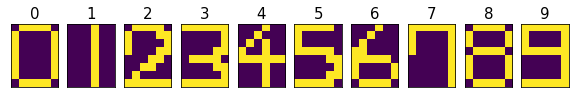

1번째 학습 ==> loss = 2.500, accuracy = -0.250
2번째 학습 ==> loss = 1.100, accuracy = 0.450
3번째 학습 ==> loss = 1.700, accuracy = 0.150
4번째 학습 ==> loss = 1.500, accuracy = 0.250
5번째 학습 ==> loss = 1.100, accuracy = 0.450
6번째 학습 ==> loss = 1.000, accuracy = 0.500
7번째 학습 ==> loss = 0.500, accuracy = 0.750
8번째 학습 ==> loss = 0.300, accuracy = 0.850
9번째 학습 ==> loss = 0.100, accuracy = 0.950
10번째 학습 ==> loss = 0.000, accuracy = 1.000

학습이 완료되었습니다!! -> 인식률 100% 


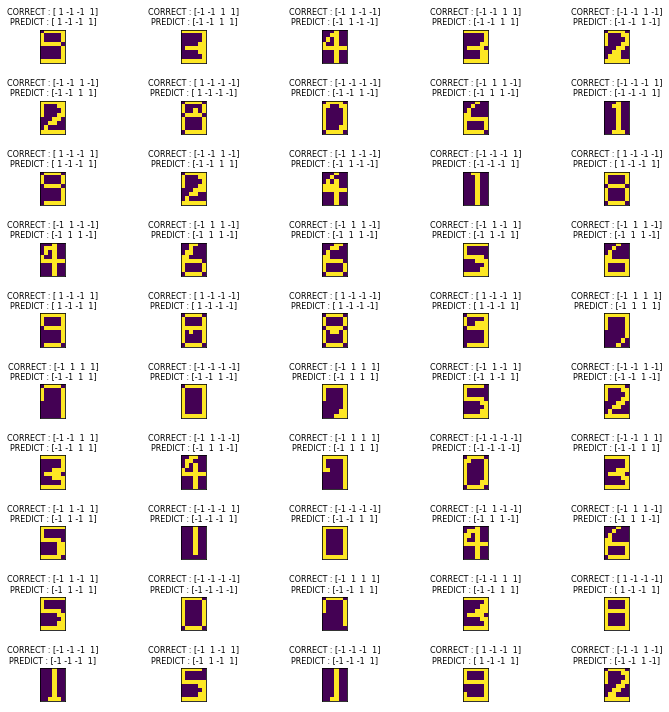


실제 데이터에 대한 결과 ==> loss = 0.260, accuracy = 0.870


In [263]:
# 1. 숫자인식을 할 수 있는 single - layer - Perceptron 설계하기
perceptron_init(48,4)            # 퍼셉트론 파라미터 초기화
run_train(answer,0)            # 학습 데이터로 학습하기
run_test(answer,0)             # TEST 데이터 결과

### 2. 강의노트에 주어진 암과 관련된 데이터를 학습시키고, 
###      주어진 2개의 임상자료가 어떤 암으로 판단되는지 결과를 보여라.

In [264]:
# 2. 암과 관련된 데이터를 학습시키고, 주어진 2개의 임상자료가 어떤암으로판단되는지 결과 알아보기

# 암 관력 학습데이터를 csv파일로 만들기
cancer_train_data = np.array(  [[0.8, 0.3, 0.9, 0.1, 0.2], [0.9, 0.4, 0.7, 0.2, 0.1], 
                         [0.2, 0.8, 0.2, 0.8, 0.1], [0.3, 0.9, 0.3, 0.7, 0.2],
                         [0.1, 0.2, 0.8, 0.1, 0.9], [0.2, 0.3, 0.9, 0.2, 0.8],
                         [0.9, 0.2, 0.4, 0.8, 0.7], [0.8, 0.3, 0.2, 0.9, 0.8]])

# 학습 데이터에 대한 실제값
cancer_train_answer = np.array([[0], [0], [1], [1], [2], [2], [3], [3]])

# 유방암, 간암, 폐암, 췌장암 각각의 암을 1 과 -1 4bit로 표현
cancer_real_answer = np.array([[1,-1,-1,-1], [-1,1,-1,-1], [-1,-1,1,-1], [-1,-1,-1,1]])

# 학습 데이터 만들기
cancer_train_data = np.append(cancer_train_data, cancer_train_answer,1 )
np.savetxt('cancer_data.csv',cancer_train_data, fmt = '%.1f' ,delimiter = ",")

# 테스트 데이터 만들기
cancer_test_y = np.array([[0.5, 0.7, 0.3, 0.5, 0.6], [0.6, 0.7, 0.8, 0.9, 0.7]])
np.savetxt('cancer_test.csv',cancer_test_y, fmt = '%.1f' ,delimiter = ",")



In [266]:
# 2. 암 관련 학습 데이터를 기반으로 암의 종류를 예측하는 퍼셉트론

perceptron_init(5,4)                       # 퍼셉트론 파라미터 초기화
run_train(cancer_real_answer,1)            # 학습 데이터로 학습하기
run_test(cancer_real_answer,1)             # TEST 데이터 결과

1번째 학습 ==> loss = 3.000, accuracy = -0.500
2번째 학습 ==> loss = 1.250, accuracy = 0.375
3번째 학습 ==> loss = 0.625, accuracy = 0.688
4번째 학습 ==> loss = 0.250, accuracy = 0.875
5번째 학습 ==> loss = 0.750, accuracy = 0.625
6번째 학습 ==> loss = 0.250, accuracy = 0.875
7번째 학습 ==> loss = 0.000, accuracy = 1.000

학습이 완료되었습니다!! -> 인식률 100% 

-----  출력 데이터 ---- 
[[-1  1 -1 -1]
 [ 1 -1 -1 -1]]

-----  예측된 암의 종류 ---- 
1 번째예측 값 : 간암
2 번째예측 값 : 유방암
